## BIKE SHARING ASSIGNMENT
                                                                                                       By Anjali Vashisth

### AIM
**********
To comprehend the elements that influence the demand for these shared bikes. **BoomBikes**, in particular, is interested in learning more about the factors that influence demand for these shared bikes in the United States. The firm is curious about the following:

- What factors play a role in estimating the demand for shared bikes?
- To what extent do those factors accurately represent the bike's requirements?

**********
#### PROCEDURE FOLLOWED AS BELOW

1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. Step 7: Making Predictions Using the Final Model
8. Step 8: Model Evaluation

> #### IMPORTING LIBRARIES

In [1]:
#libraries
import numpy as np
import pandas as pd
import warnings # removes all warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

> ### STEP 1 Reading and Understanding the Data (EDA)

In [2]:
# reading Bike day csv dataset
bikedata = pd.read_csv("day.csv")
bikedata.head(7)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510

In [3]:
bikedata.info()
#!!!OBSERVATION - NONE OF THE OBJECT IS HAVING NULL VAL; AND TYPE IS ALSO VALID!!!
#round((bike.isnull().sum()/len(bike.index))*100, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
bikedata.nunique().sort_values()
#!!!OBSERVATION - WE CAN SEE THAT WE HAVE 2 OR MORE UNIQUE VALS SO CAN'T DECIDE ON DELETING THE COLUMNS FOR NOW !!! 

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [6]:
print("shape before droping duplicacy: ",bikedata.shape)
bikedata.drop_duplicates(subset=None, inplace=True)
print("shape after: ",bikedata.shape)
#!!!OBSERVATION - there was no duplicacy as shape before = shape After

shape before droping duplicacy:  (730, 16)
shape after:  (730, 16)


*******************
> ### Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

> From the Data Dictionary - we can observe mentioned things:
1. The variable "Instant" - shows the record index which will not affect the market on bike sharing
2. The variable dteday is an actual date which is divided into two vars namely: yr(year) and mnth(month).
3. cnt: count of total rental bikes including both casual and registered hence these two cols not required
4. atemp: feeling temperature in Celsius; Hence we don't require temp as atemp is the temperature we feel and will act according to it. Temp is for scientists but not data scientists here ;p

> and take following actions:

1. **Drop "Instant", "dteday", "causal", "registered", "temp"**

In [7]:
bikedata=bikedata.drop(["instant","dteday","casual", "registered","temp"], axis=1)
bikedata.sample()

season  yr  mnth  holiday  weekday  workingday  weathersit     atemp  \
667       4   1    10        0        2           1           2  15.49545   

         hum  windspeed   cnt  
667  82.5455  14.271603  1096

> ### STEP 2 Visualising the Data

In [8]:
#Copy dataframe into a new one Moving onto stage 2

bikevisual = bikedata.copy()
bikevisual.head()

season  yr  mnth  holiday  weekday  workingday  weathersit     atemp  \
0       1   0     1        0        6           0           2  18.18125   
1       1   0     1        0        0           0           2  17.68695   
2       1   0     1        0        1           1           1   9.47025   
3       1   0     1        0        2           1           1  10.60610   
4       1   0     1        0        3           1           1  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

1. **Observed: SEASON("season") – "1":"spring", "2":"summer", "3":"fall", "4":"winter"**
2. **Observed: YEAR("yr")– 2018 = ‘0’ and 2019 = ‘1’**
3. **Observed: MONTH("mnth")- (1,2,3,4,5,6,7,8,9,10,11,12): 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')**
4. **Observed: HOLIDAY("holiday")– "1":"Holiday", "0":"Not holiday"**
5. **Observed: WEEKDAY("weekday")- "0":"Tue", "1":"Wed", "2":"Thus", "3":"Fri", "4":"Sat", "5":"Sun", "6":"Mon"**
6. **Observed: WORKING DAY("workingday")– "1":"Working day", "0":"Not working day"**
7. **Observed: WEATHER SITUATION("weathersit")– "1":"Clear", "2":"Mist + Broken clouds", "3":"Light Rain + Scattered clouds"**


In [9]:
#season
bikevisual.season = bikevisual.season.astype(str).map({"1":"spring", "2":"summer", "3":"fall", "4":"winter"})
print(bikevisual.season.value_counts())
#year
bikevisual.yr = bikevisual.yr.astype(str).map({"1":"2019", "0":"2018"})
print(bikevisual.yr.value_counts())
#month
bikevisual["mnth"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
print(bikevisual.mnth.value_counts())
#holiday
bikevisual.holiday = bikevisual.holiday.astype(str).map({"1":"Holiday", "0":"Not holiday"})
print(bikevisual.holiday.value_counts())
#weekday
bikevisual.weekday = bikevisual.weekday.astype(str).map({"0":"Tue", "1":"Wed", "2":"Thus", "3":"Fri", "4":"Sat", "5":"Sun", "6":"Mon"})
print(bikevisual.weekday.value_counts())
#working day
bikevisual.workingday = bikevisual.workingday.astype(str).map({"1":"Working day", "0":"Not working day"})
print(bikevisual.workingday.value_counts())
#weather situation
bikevisual.weathersit = bikevisual.weathersit.astype(str).map({"1":"Clear", "2":"Mist + Broken clouds", "3":"Light Rain + Scattered clouds"})
print(bikevisual.weathersit.value_counts())


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
2018    365
2019    365
Name: yr, dtype: int64
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64
Not holiday    709
Holiday         21
Name: holiday, dtype: int64
Mon     105
Tue     105
Wed     105
Thus    104
Sat     104
Sun     104
Fri     103
Name: weekday, dtype: int64
Working day        499
Not working day    231
Name: workingday, dtype: int64
Clear                            463
Mist + Broken clouds             246
Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64


In [10]:
bikevisual.head()

season    yr mnth      holiday weekday       workingday  \
0  spring  2018  Jan  Not holiday     Mon  Not working day   
1  spring  2018  Jan  Not holiday     Tue  Not working day   
2  spring  2018  Jan  Not holiday     Wed      Working day   
3  spring  2018  Jan  Not holiday    Thus      Working day   
4  spring  2018  Jan  Not holiday     Fri      Working day   

             weathersit     atemp      hum  windspeed   cnt  
0  Mist + Broken clouds  18.18125  80.5833  10.749882   985  
1  Mist + Broken clouds  17.68695  69.6087  16.652113   801  
2                 Clear   9.47025  43.7273  16.636703  1349  
3                 Clear  10.60610  59.0435  10.739832  1562  
4                 Clear  11.46350  43.6957  12.522300  1600

> Preparing Function to Plot

In [11]:
def plotpie_multi(plt, data, col):
    """
    Used for plotting Pie plots, it will return plt and can be used for multiple plots.
    """
    count_val = data[col].value_counts()
    explode = np.zeros(len(count_val))
    explode[0] = 0.04
    plt.pie(count_val, labels=count_val.keys(), autopct='%1.1f%%', explode=explode, shadow=True, startangle=50, textprops = {"fontsize":12})
    plt.title(col, fontname="DejaVu Sans", size=20, fontweight="bold")
    return plt

> #### STEP 2.2 - UNIVARIATE ANALYSIS
> ##### Visualizing Categorical Variables

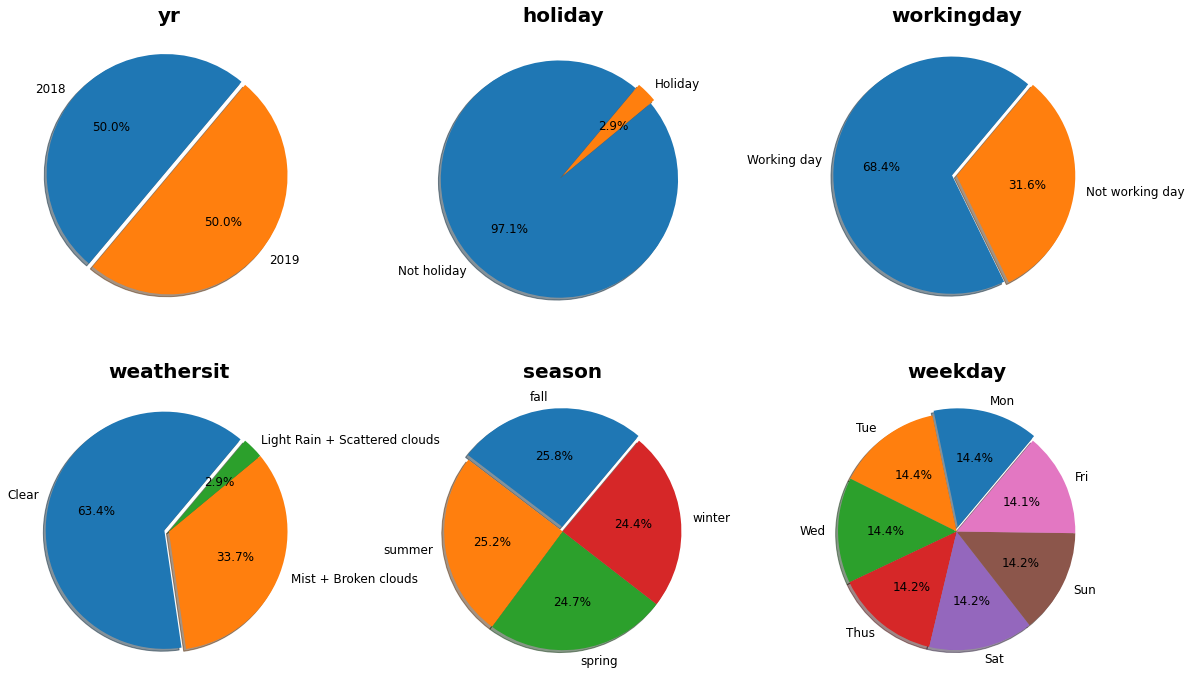

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt = plotpie_multi(plt, bikevisual, "yr")
plt.subplot(2,3,2)
plt = plotpie_multi(plt, bikevisual, "holiday")
plt.subplot(2,3,3)
plt = plotpie_multi(plt, bikevisual, "workingday")
plt.subplot(2,3,4)
plt = plotpie_multi(plt, bikevisual, "weathersit")
plt.subplot(2,3,5)
plt = plotpie_multi(plt, bikevisual, "season")
plt.subplot(2,3,6)
plt = plotpie_multi(plt, bikevisual, "weekday")
plt.show()

**OBSERVED THINGS:**
1. **In two years span, there is only 2.9% holiday, and the rest are nonholiday.**
2. **However, 68.4% is a working day, and 31.6% is a non-working day.**
3. **Most of the time (63.4%), it's a clear sky, and rarely (2.9%) is a thunderstorm.**

> #### UNIVARIATE ANALYSIS (CONTINUED...)
> ##### Visualising Numeric Variables

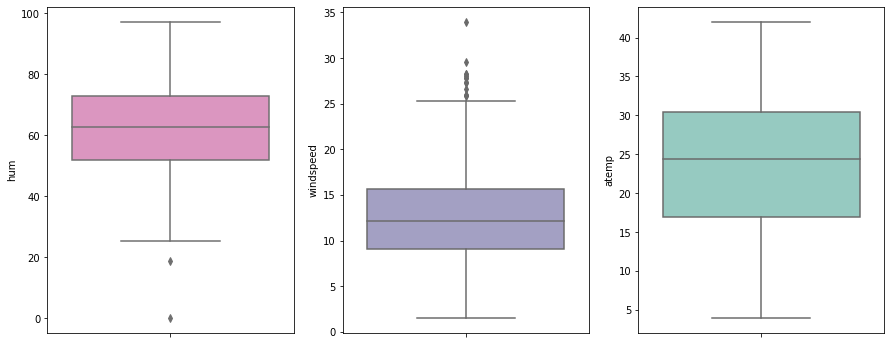

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,3)
sns.boxplot(y="atemp", data=bikevisual, palette="Set3")
plt.subplot(1,3,1)
sns.boxplot(y="hum", data=bikevisual, palette="Set2_r")
plt.subplot(1,3,2)
sns.boxplot(y="windspeed", data=bikevisual, palette="Purples_r")
plt.show()

**OBSERVED THING:**
**For hum and windspeed has some outliers.**

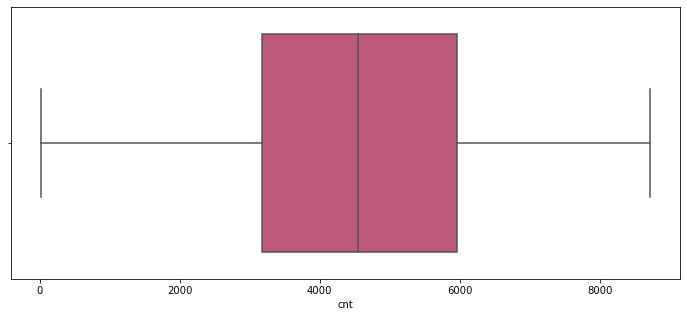

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(x="cnt", data=bikevisual, palette="plasma")
plt.show()

**OBSERVED THING:**
**For "cnt" the value lies between 3000 to 6000.**

> #### Bivariate ANALYSIS
> ##### Visualising Categorical Variables

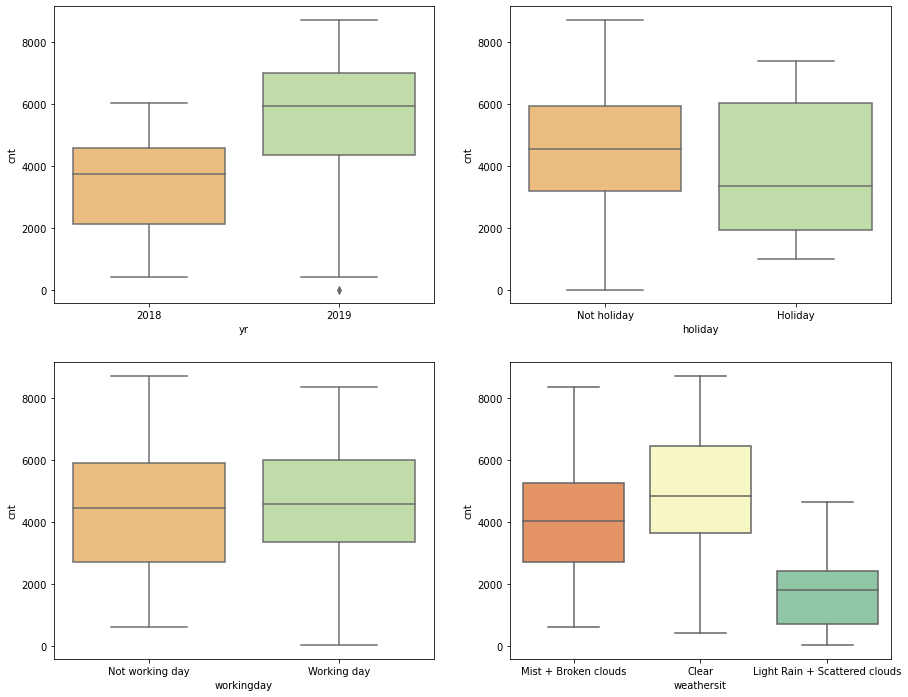

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(x ="yr", y="cnt", data=bikevisual, palette="Spectral")
plt.subplot(2,2,2)
sns.boxplot(x ="holiday", y="cnt", data=bikevisual, palette="Spectral")
plt.subplot(2,2,3)
sns.boxplot(x ="workingday", y="cnt", data=bikevisual, palette="Spectral")
plt.subplot(2,2,4)
sns.boxplot(x ="weathersit", y="cnt", data=bikevisual, palette="Spectral")
plt.show()

**OBSERVATIONS**

cnt vs. {}:
1. `yr`: 
    - 2018 mean is around 4k, and 2019 mean 6k.
**This means in 2019, more people took bike rides.**

2. `holiday`:
    - **Not holiday** have a mean of 4.5k, and **holiday** means around 3.3k.
**most people borrow the bike on a nonholiday than a holiday.**

3. `workingday`:
    - Nonworking days and working days have a similar mean and 75th percentile, but nonworking days have higher upper whiskers.

Which means **there is a slight chance that people will borrow bikes more on a nonworking day.**

4. `weathersit`:
We can see that **people don't prefer to rent on thunderstorms most of the time. And Most people rent it in clear weather.**

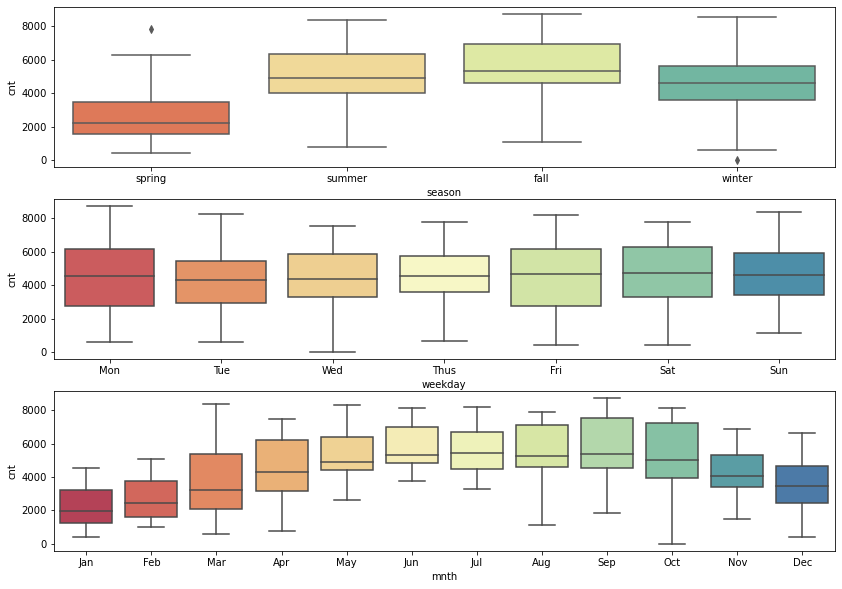

In [16]:
plt.figure(figsize=(14, 10))
plt.subplot(3,1,1)
sns.boxplot(x ="season", y="cnt", data=bikevisual, palette="Spectral")
plt.subplot(3,1,2)
sns.boxplot(x ="weekday", y="cnt", data=bikevisual, palette="Spectral")
plt.subplot(3,1,3)
sns.boxplot(x ="mnth", y="cnt", data=bikevisual, palette="Spectral")
plt.show()

**OBSERVATIONS**

##### `cnt vs season`: 
- Most people tend to rent bikes in the fall and summer. 
- And people prefer to book less in spring.

##### `cnt vs weekdays`:
- Mean are the same for all weekdays.
- But Wednesday has more chance of booking less the other weekday.
- And Monday has a high probability of renting a bike.

`cnt  vs mnth`:
- People prefer to rent a bike between May to October.
- And gradually decrease from December to Feb. 

> #### Bivariate ANALYSIS
> ##### Visualising Numerical Variables

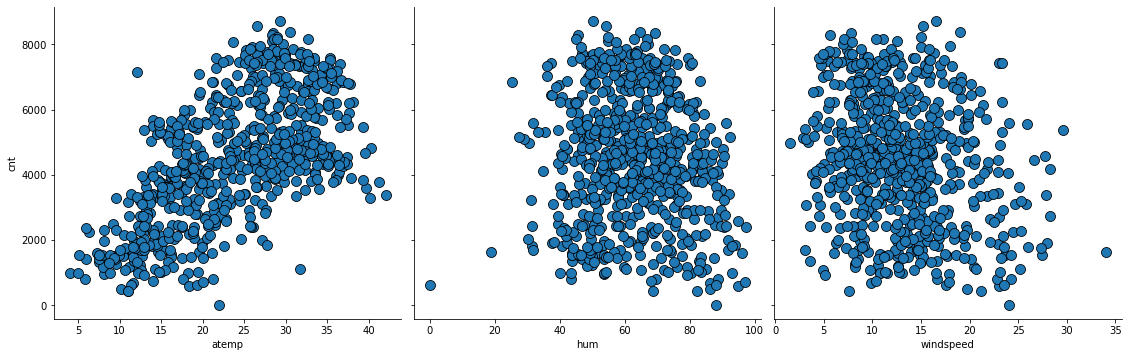

In [17]:
ax = sns.pairplot(data = bikevisual, y_vars = 'cnt', x_vars=["atemp", "hum", "windspeed"] ,
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
ax.fig.set_size_inches(16,5)
plt.show()

**OBSERVATIONS**
- we can see when the `atemp` is around 36+ people tend to rent bikes less ane temp between 20-33 people tend to book more. 
- When `hum` is between 40-85 people rent bikes more. 
- When `windspeed` is between 5-25 people rent bikes more.

> #### Multivariate ANALYSIS
> ##### Visualising Numerical Variables

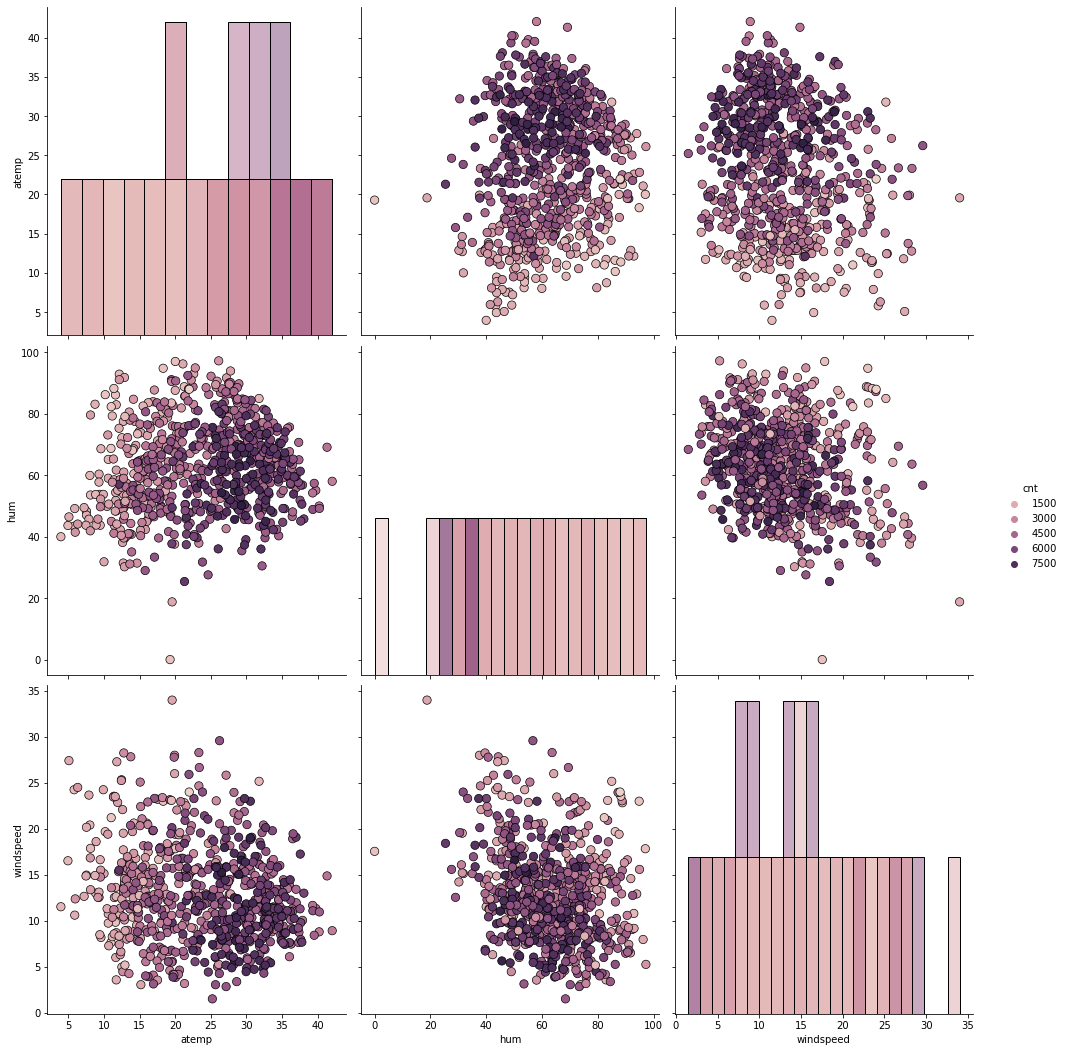

In [18]:
g = sns.pairplot(data = bikevisual, hue = 'cnt', vars=["atemp", "hum", "windspeed"] , diag_kind = 'hist',
             plot_kws = {'alpha': 1.0, 's': 70, 'edgecolor': 'k'},
             height = 4)
g.fig.set_size_inches(15,15)
plt.show()

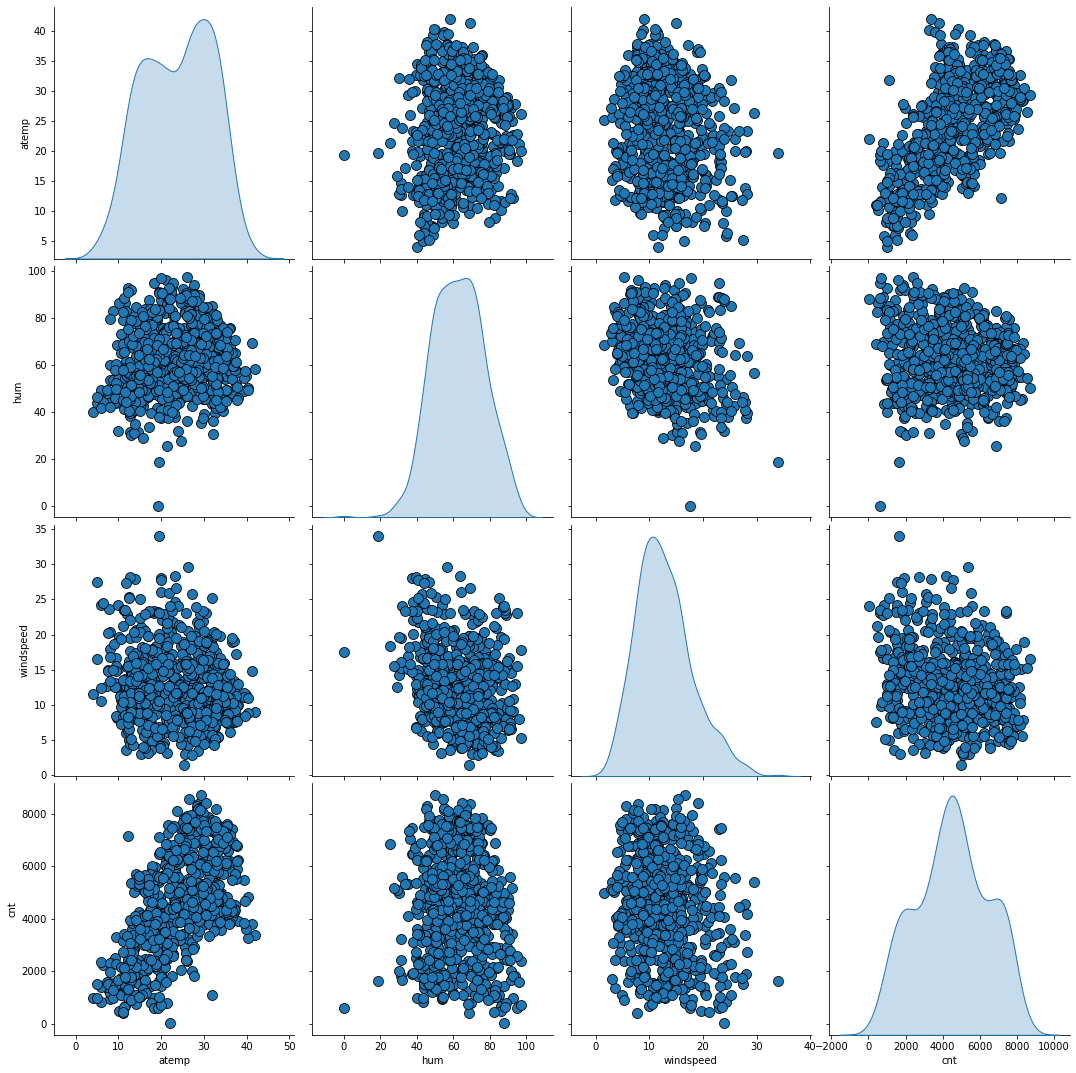

In [19]:
g = sns.pairplot(data = bikevisual[['atemp','hum','windspeed','cnt']], diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'},
             height = 5)
g.fig.set_size_inches(15,15)
plt.show()

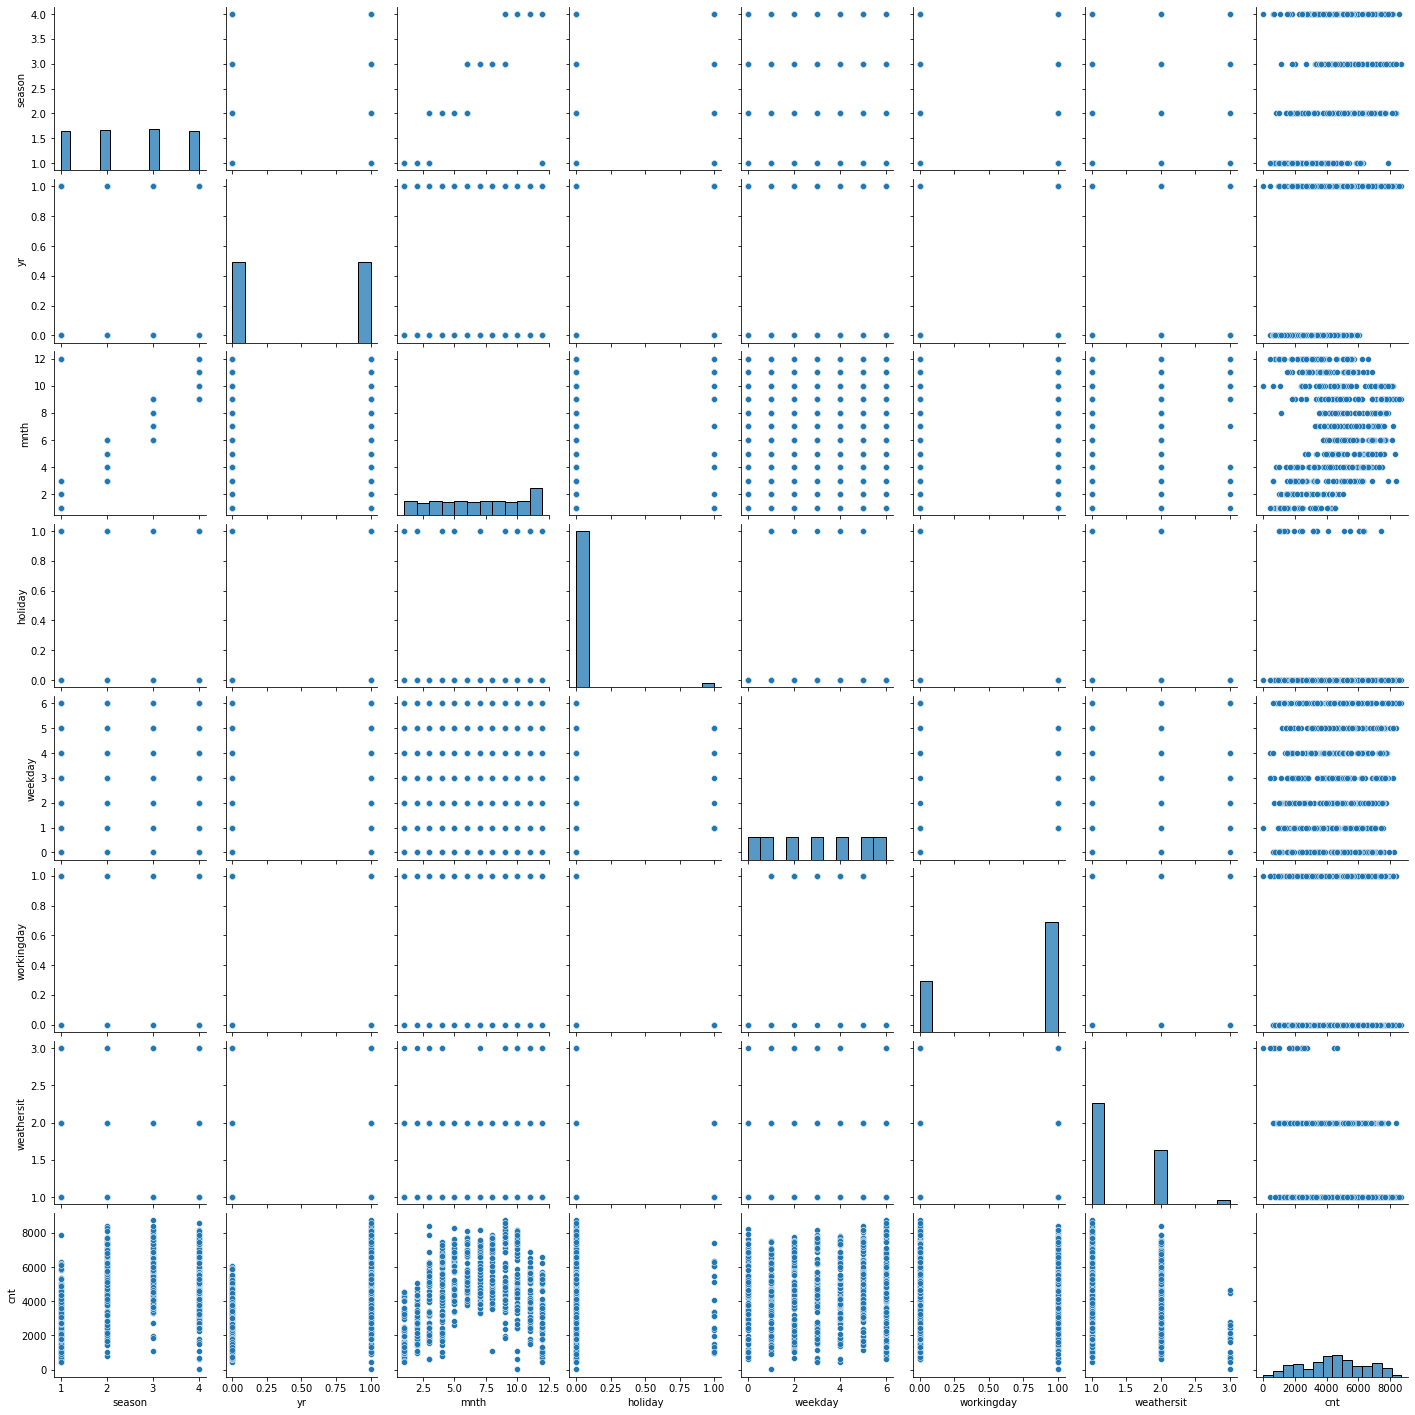

In [20]:
sns.pairplot(bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit','cnt']])
plt.show()

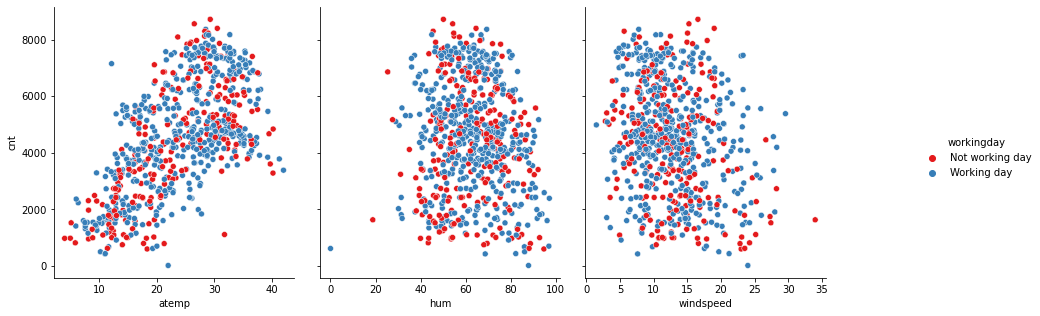

In [21]:
# Checking the impact of workingday against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='workingday', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

**OBSERVATION - workingday** Distribution is kinda same for all 

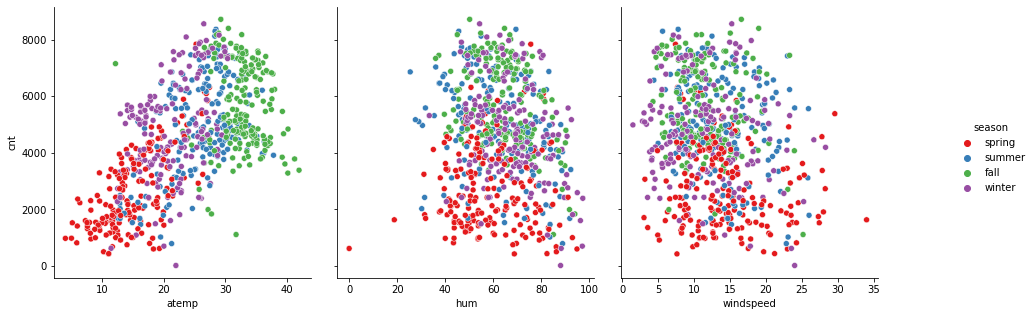

In [22]:
#Checking the impact of 'season' against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='season', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

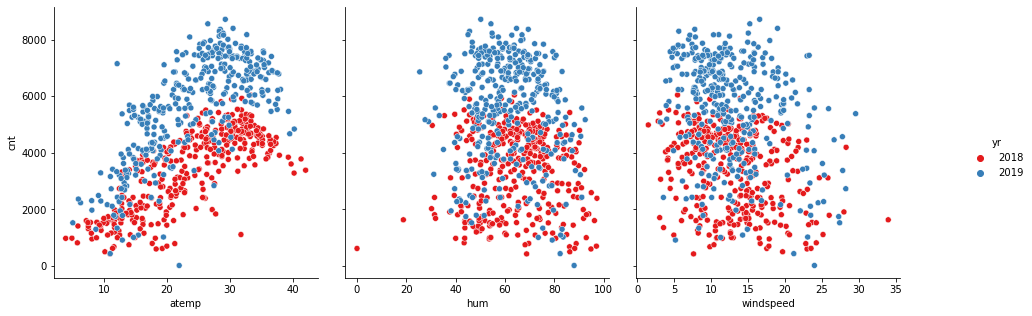

In [23]:
#Checking the impact of 'yr'  against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='yr', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

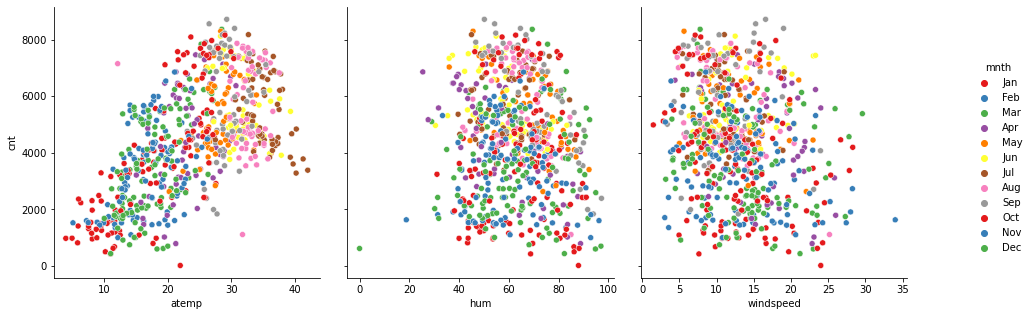

In [24]:
#Checking the impact of 'mnth'  against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='mnth', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

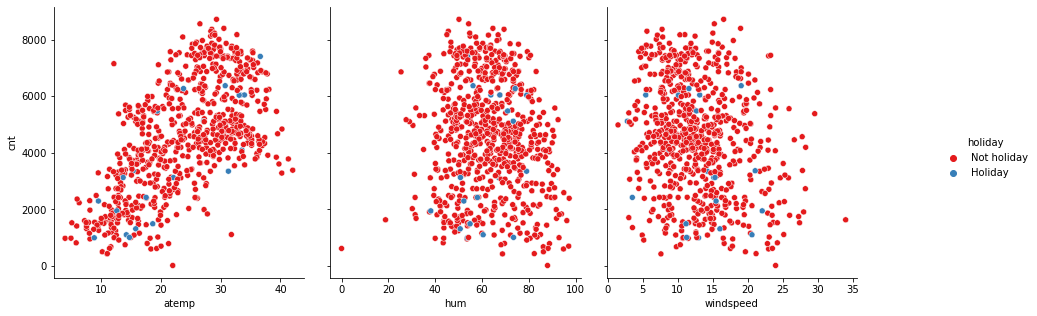

In [25]:
#Checking the impact of  'holiday',   against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='holiday', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

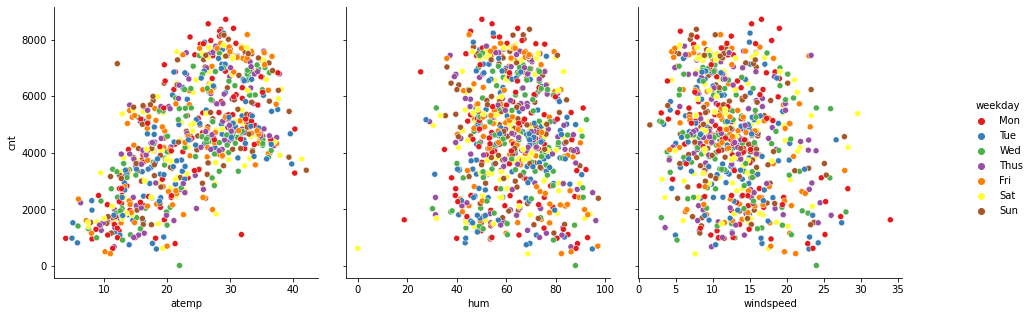

In [26]:
#Checking the impact of  'weekday'  against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='weekday', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

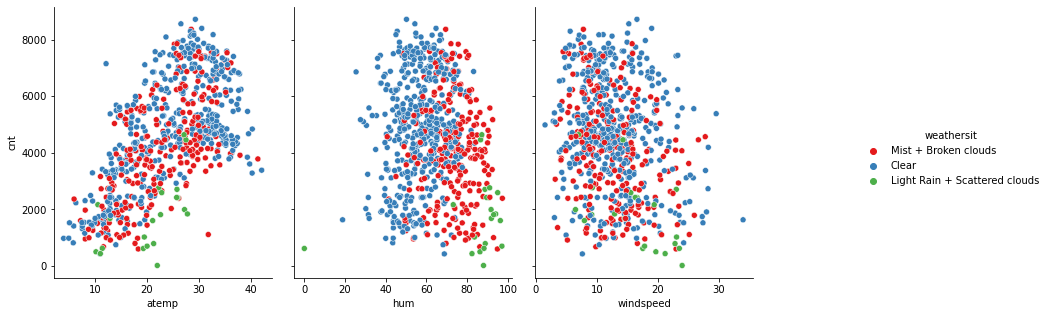

In [27]:
#Checking the impact of  ,'weathersit'  against the numerical variable
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikevisual, hue='weathersit', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

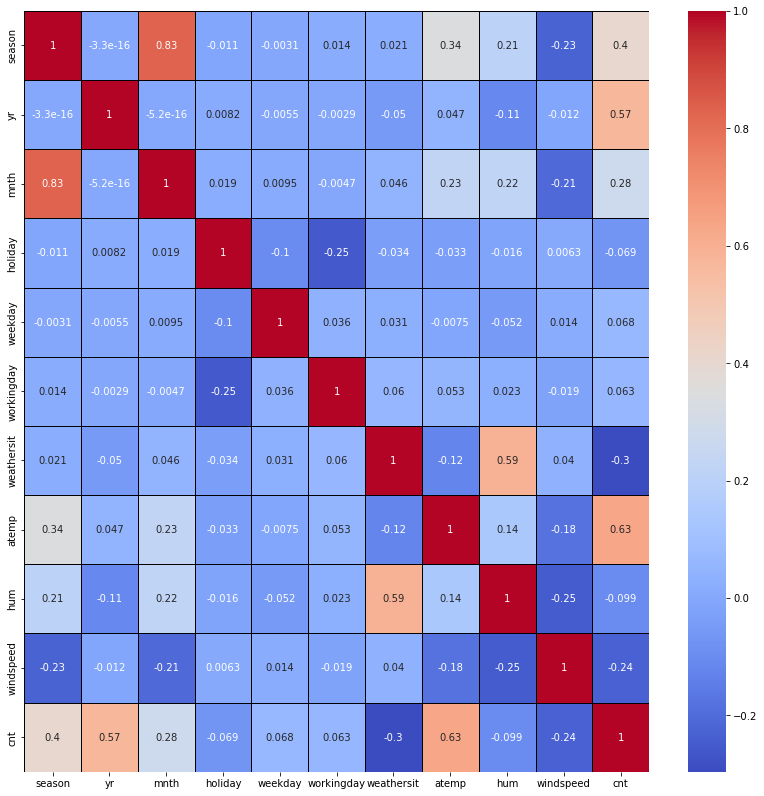

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit     atemp       hum  windspeed       cnt  
season        0.013762    0.021306  0.342014  0.208220  -0.229607  0.404584  
yr           -0.002945   -0.050322  0.047215 -0.112547  -0.011624  0.569728  
mnth         -0.004688    0.045613  0.226430  0.224937  -0.208013  0.278191  
holiday      -0.252948   -0.034395 -0.032703 -0.015662   0.006257 -0.068764  
weekday       0.035800    0.031112 -0.007539 -0.052290   0.014283  0.067534  
workingday    1.000000    0.060236  0.052940  0.023202  -0.018666  0.062542  
weathersit    0.060236    1.000000 -0.120559  0.590277   0.039769 -0.295929  
atemp         0.052940   -0.120559  1.000000  0.141512  -0.183876  0.630685  
hum           0.023202    0.590277  0.141512  1.000000  -0.248506 -0.098543  
windspeed    -0.018666    0.039769 -0.183876 -0.248506   1.000000 -0.235132  
cnt           0.062542   -0.295929  0.630685 -0.098543  -0.235132  1.000000

In [28]:
plt.figure(figsize=(14,14))
sns.heatmap(bikedata.corr(), cmap="coolwarm", annot=True, linecolor="black", linewidths=1)
plt.show()
bikedata.corr()

**Observations**
1. **season, mnth, atemp and yr shows high correlation with cnt**
2. **weathersit, hum, holiday and windspeed show high inverse correlation with cnt**

> #### Data Preparation

##### Create dummy variable for weathersit, season, weekday and mnth

In [29]:
weathersit = pd.get_dummies(bikevisual.weathersit, drop_first=True)
print(weathersit.head())
season = pd.get_dummies(bikevisual.season, drop_first=True)
print(season.head())
weekday = pd.get_dummies(bikevisual.weekday, drop_first=True)
print(weekday.head())
mnth = pd.get_dummies(bikevisual.mnth, drop_first=True)
print(mnth.head())

   Light Rain + Scattered clouds  Mist + Broken clouds
0                              0                     1
1                              0                     1
2                              0                     0
3                              0                     0
4                              0                     0
   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Mon  Sat  Sun  Thus  Tue  Wed
0    1    0    0     0    0    0
1    0    0    0     0    1    0
2    0    0    0     0    0    1
3    0    0    0     1    0    0
4    0    0    0     0    0    0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0

##### Removing the columns which we have created a dummy varaible

In [30]:
bikevisual.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bikevisual.shape

(730, 7)

##### Converting year, holiday, and working day to 1 and 0s, so that we can use for model building.

In [31]:
# converting yr to 1s and 0s
bikevisual.yr.replace(("2019","2018"), (1,0), inplace=True)
print(bikevisual.yr.value_counts())
# converting holiday to 1s and 0s
bikevisual.holiday.replace(("Holiday","Not holiday"), (1,0), inplace=True)
print(bikevisual.holiday.value_counts())
# converting workingday to 1s and 0s
bikevisual.workingday.replace(("Working day", "Not working day"), (1,0), inplace=True)
print(bikevisual.workingday.value_counts())

0    365
1    365
Name: yr, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


In [32]:
bikevisual.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt
0   0        0           0  18.18125  80.5833  10.749882   985
1   0        0           0  17.68695  69.6087  16.652113   801
2   0        0           1   9.47025  43.7273  16.636703  1349
3   0        0           1  10.60610  59.0435  10.739832  1562
4   0        0           1  11.46350  43.6957  12.522300  1600

##### Merging the dataframe

In [33]:
bike_final = pd.concat([bikevisual, weathersit, season, weekday, mnth], axis = 1)
bike_final.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  \
0   0        0           0  18.18125  80.5833  10.749882   985   
1   0        0           0  17.68695  69.6087  16.652113   801   
2   0        0           1   9.47025  43.7273  16.636703  1349   
3   0        0           1  10.60610  59.0435  10.739832  1562   
4   0        0           1  11.46350  43.6957  12.522300  1600   

   Light Rain + Scattered clouds  Mist + Broken clouds  spring  ...  Dec  Feb  \
0                              0                     1       1  ...    0    0   
1                              0                     1       1  ...    0    0   
2                              0                     0       1  ...    0    0   
3                              0                     0       1  ...    0    0   
4                              0                     0       1  ...    0    0   

   Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0    1    0    0    0    0    0    0    0  
1    1    0    0    0    0    0    0    0  
2    1    0    0    0    0    0    0    0  
3    1    0    0    0    0    0    0    0  
4    1    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [34]:
bike_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             730 non-null    int64  
 1   holiday                        730 non-null    int64  
 2   workingday                     730 non-null    int64  
 3   atemp                          730 non-null    float64
 4   hum                            730 non-null    float64
 5   windspeed                      730 non-null    float64
 6   cnt                            730 non-null    int64  
 7   Light Rain + Scattered clouds  730 non-null    uint8  
 8   Mist + Broken clouds           730 non-null    uint8  
 9   spring                         730 non-null    uint8  
 10  summer                         730 non-null    uint8  
 11  winter                         730 non-null    uint8  
 12  Mon                            730 non-null    uin

> #### Splitting the Data into Training and Testing Sets

##### Importing libraries for training and testing data and dividing them into 70 -30 ratio

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
# importing RFE and LinearRegression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
np.random.seed(0)
# dividing the dataset into train and test with 70/30 ratio
bike_train, bike_test = train_test_split(bike_final, train_size = 0.70, test_size = 0.30, random_state = 100)

In [39]:
print(bike_train.shape, bike_test.shape)

(510, 29) (219, 29)


#### A LOOK AT TRAINING SET

In [40]:
bike_train.head()

yr  holiday  workingday    atemp      hum  windspeed   cnt  \
653   1        0           1  23.0423  55.8333  12.208807  7534   
576   1        0           1  33.1448  70.4167  11.083475  7216   
426   1        0           0  20.6746  62.1250  10.792293  4066   
728   1        0           0  11.5850  48.3333  23.500518  1796   
482   1        0           0  18.8752  48.9583   8.708325  4220   

     Light Rain + Scattered clouds  Mist + Broken clouds  spring  ...  Dec  \
653                              0                     0       0  ...    0   
576                              0                     0       0  ...    0   
426                              0                     1       1  ...    0   
728                              0                     0       1  ...    1   
482                              0                     1       0  ...    0   

     Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
653    0    0    0    0    0    0    0    1    0  
576    0    0    1    0    0    0    0    0    0  
426    0    0    0    0    1    0    0    0    0  
728    0    0    0    0    0    0    0    0    0  
482    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [41]:
bike_train.nunique().sort_values()

yr                                 2
Nov                                2
May                                2
Mar                                2
Jun                                2
Jul                                2
Jan                                2
Feb                                2
Dec                                2
Aug                                2
Wed                                2
Tue                                2
Thus                               2
Oct                                2
Sun                                2
Mon                                2
winter                             2
summer                             2
spring                             2
Mist + Broken clouds               2
Light Rain + Scattered clouds      2
workingday                         2
holiday                            2
Sat                                2
Sep                                2
hum                              445
windspeed                        467
a

**Rescalling feature of bike_train dataframe**

1. **Min-Max scaling**
2. **Standardisation (mean-0, sigma-1)**
##### However, I m going to use minMax scal.

In [42]:
# loading MinMaxScaler object
scaler = MinMaxScaler()

In [43]:
# Apply *scaler* to all the columns except the '1s and 0s' and 'dummy' variables and fit- transforming it
num_vars = ['hum', 'windspeed', 'atemp', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [44]:
bike_train.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  \
653   1        0           1  0.501133  0.575354   0.300794  0.864243   
576   1        0           1  0.766351  0.725633   0.264686  0.827658   
426   1        0           0  0.438975  0.640189   0.255342  0.465255   
728   1        0           0  0.200348  0.498067   0.663106  0.204096   
482   1        0           0  0.391735  0.504508   0.188475  0.482973   

     Light Rain + Scattered clouds  Mist + Broken clouds  spring  ...  Dec  \
653                              0                     0       0  ...    0   
576                              0                     0       0  ...    0   
426                              0                     1       1  ...    0   
728                              0                     0       1  ...    1   
482                              0                     1       0  ...    0   

     Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
653    0    0    0    0    0    0    0    1    0  
576    0    0    1    0    0    0    0    0    0  
426    0    0    0    0    1    0    0    0    0  
728    0    0    0    0    0    0    0    0    0  
482    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [45]:
bike_train.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.512989    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.332086    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.526811    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt  Light Rain + Scattered clouds  Mist + Broken clouds  \
count  510.000000                     510.000000            510.000000   
mean     0.513620                       0.029412              0.343137   
std      0.224593                       0.169124              0.475223   
min      0.000000                       0.000000              0.000000   
25%      0.356420                       0.000000              0.000000   
50%      0.518638                       0.000000              0.000000   
75%      0.684710                       0.000000              1.000000   
max      1.000000                       1.000000              1.000000   

           spring  ...         Dec         Feb         Jan         Jul  \
count  510.000000  ...  510.000000  510.000000  510.000000  510.000000   
mean     0.243137  ...    0.084314    0.066667    0.088235    0.076471   
std      0.429398  ...    0.278131    0.249689    0.283915    0.266010   
min      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
50%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
max      1.000000  ...    1.000000    1.000000    1.000000    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.074510    0.098039    0.084314    0.086275    0.086275    0.080392  
std      0.262857    0.297660    0.278131    0.281045    0.281045    0.272166  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

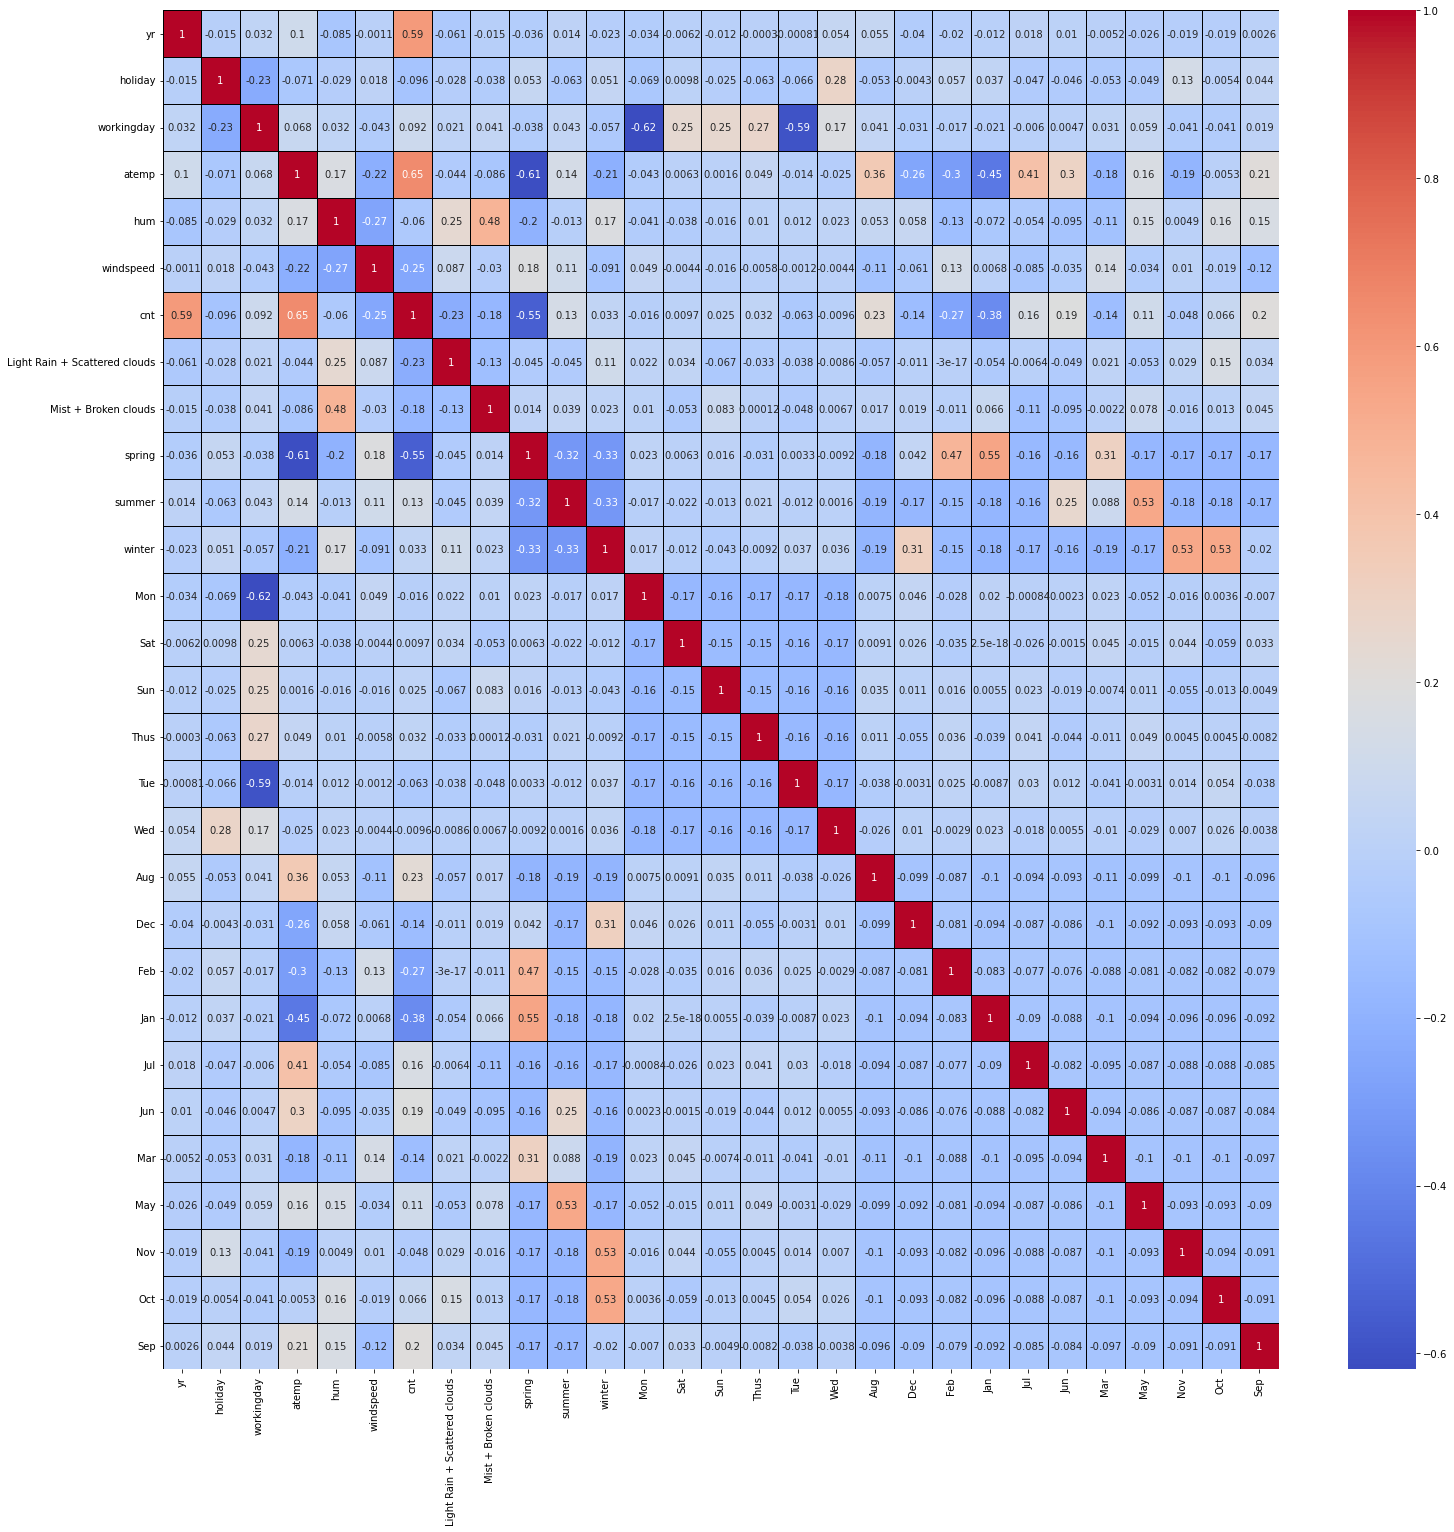

In [46]:
plt.figure(figsize=(25,25))
sns.heatmap(bike_train.corr(), cmap="coolwarm", annot=True, linecolor="black", linewidths=1)
plt.show()

**There is multi-colinearity between the variables, but while building model will use RFE to auto-remove it.**

> #### Building a linear model

**Dividing the train dataset to X and y**

In [47]:
# Getting X and y for train data set
y_train = bike_train.pop('cnt')
X_train = bike_train

In [48]:
print(X_train.shape, y_train.shape)

(510, 28) (510,)


#### RFE (Recursive feature elimination)
> We have around 30 columns, so it's better to use Auto elimination till 18 variable

In [49]:
# loading LinearRegression object
lr = LinearRegression()

In [50]:
# fitting the X and y data of train set
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
# applying RFE to auto eliminate till 18 variable
rfe = RFE(lr, 18)
rfe = rfe.fit(X_train, y_train)

In [52]:
# making a list of column names, support and ranking of RFE
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [53]:
# converting the list to df and sorting by rank
rfe_df = pd.DataFrame(rfe_list, columns=["name", "support", "rank"])
rfe_df.sort_values(by = "rank")

name  support  rank
0                              yr     True     1
25                            Nov     True     1
24                            May     True     1
21                            Jul     True     1
20                            Jan     True     1
19                            Feb     True     1
18                            Dec     True     1
11                            Mon     True     1
10                         winter     True     1
27                            Sep     True     1
8                          spring     True     1
1                         holiday     True     1
2                      workingday     True     1
3                           atemp     True     1
4                             hum     True     1
5                       windspeed     True     1
6   Light Rain + Scattered clouds     True     1
7            Mist + Broken clouds     True     1
9                          summer    False     2
17                            Aug    False     3
22                            Jun    False     4
15                            Tue    False     5
16                            Wed    False     6
14                           Thus    False     7
13                            Sun    False     8
26                            Oct    False     9
12                            Sat    False    10
23                            Mar    False    11

In [54]:
# counting all rank 1
rfe_df[rfe_df['rank'] == 1].shape[0]

18

In [55]:
# printing only rfe supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'Light Rain + Scattered clouds', 'Mist + Broken clouds', 'spring',
       'winter', 'Mon', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep'],
      dtype='object')

##### Building model using statsmodel, for the detailed statistics

In [56]:
# Importing statsmodels.api
import statsmodels.api as sm

In [57]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

We will be creating five models

1st Model 

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [59]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.17e-188
Time:                        00:04:47   Log-Likelihood:                 520.86
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**OBSERVATION - FEB HAS HIGH P VALUE, NOW WE'LL CHECK IT'S VIF**

In [62]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [63]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                             hum  27.37
3                           atemp  18.36
2                      workingday   5.25
8                          spring   4.28
5                       windspeed   4.15
9                          winter   3.12
13                            Jan   2.39
7            Mist + Broken clouds   2.27
0                              yr   2.07
10                            Mon   1.97
12                            Feb   1.92
16                            Nov   1.85
11                            Dec   1.67
14                            Jul   1.47
15                            May   1.33
6   Light Rain + Scattered clouds   1.27
17                            Sep   1.26
1                         holiday   1.20

`hum`, `temp`, and `workingday` has high VIF value but `Feb`  have less
#### But our rule for removing varaible is:
1. Both VIF(5+) and P-value(0.05+) is high:
    - If p-value is high and VIF value is high then remove it.
2. High-low:
    - If p-value is high and VIF value is low then remove it.
    - If p-value is low and VIF value is high then remove it.
3. Both VIF(5<) and P-value(0.05<) is Low:
    - We keep the variable.

However, `Feb` is having high p-value and low VIF, so we will remove it.
*****

2nd Model 

In [64]:
# dropping Feb column
X_train_rfe = X_train_rfe.drop('Feb', axis=1)
X_train_rfe.head()
print(X_train_rfe.shape)

(510, 17)


In [65]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.08e-188
Time:                        00:04:52   Log-Likelihood:                 518.91
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -925.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Feb col was dropped;

**Turns out Holiday has High P Value Now its VIF value will be Checked**

In [67]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [68]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                             hum  26.90
3                           atemp  17.83
2                      workingday   5.24
5                       windspeed   4.14
8                          spring   3.11
9                          winter   3.11
7            Mist + Broken clouds   2.27
0                              yr   2.07
10                            Mon   1.97
15                            Nov   1.83
12                            Jan   1.76
11                            Dec   1.55
13                            Jul   1.46
14                            May   1.33
6   Light Rain + Scattered clouds   1.26
16                            Sep   1.26
1                         holiday   1.19

In [69]:
# dropping holiday column
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

3rd Model 

In [70]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [71]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.52e-189
Time:                        00:05:31   Log-Likelihood:                 517.39
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     493   BIC:                            -928.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Feb and holiday col was dropped;

**Turns out May has High P Value as its greater than .003 Now its VIF value will be Checked**


In [72]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [73]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                             hum  26.79
2                           atemp  17.71
1                      workingday   4.67
4                       windspeed   4.12
8                          winter   3.11
7                          spring   3.08
6            Mist + Broken clouds   2.26
0                              yr   2.07
9                             Mon   1.84
14                            Nov   1.80
11                            Jan   1.76
10                            Dec   1.55
12                            Jul   1.46
13                            May   1.33
5   Light Rain + Scattered clouds   1.26
15                            Sep   1.26

In [74]:
# dropping May column
X_train_rfe = X_train_rfe.drop(['May'], axis=1)

4th Model 

In [75]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [76]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.71e-189
Time:                        00:11:56   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### ALl the variables  now have low value which is pretty good

In [77]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [78]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                             hum  25.65
2                           atemp  17.69
1                      workingday   4.67
4                       windspeed   4.12
8                          winter   2.93
7                          spring   2.92
6            Mist + Broken clouds   2.26
0                              yr   2.07
9                             Mon   1.83
13                            Nov   1.80
11                            Jan   1.76
10                            Dec   1.55
12                            Jul   1.41
5   Light Rain + Scattered clouds   1.25
14                            Sep   1.21

**Hum and atemp have high VIF values hence they will be removed …season, mnth, atemp and yr
 had high correlation with cnt hence we will not remove atemp**

In [79]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

5th Model 

In [80]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()  

In [81]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.25e-187
Time:                        00:22:52   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### EVERYTHING SEEMS COOL HERE

In [83]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [84]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           atemp  6.60
1                      workingday  4.57
3                       windspeed  4.09
7                          winter  2.57
6                          spring  2.43
0                              yr  2.06
8                             Mon  1.82
12                            Nov  1.77
10                            Jan  1.67
5            Mist + Broken clouds  1.56
9                             Dec  1.48
11                            Jul  1.36
13                            Sep  1.21
4   Light Rain + Scattered clouds  1.09

since we are keeping atemp although it's value is 6.60 but we can remove workingday lastly

In [85]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

6th Model 

In [86]:
# Adding a constant variable
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [87]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.29e-183
Time:                        00:30:37   Log-Likelihood:                 495.92
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Now we have a high value of Monday greater than 0.03 hence we'll drop the Mon col

In [88]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [89]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                           atemp  4.61
2                       windspeed  3.98
6                          winter  2.55
5                          spring  2.35
0                              yr  2.06
11                            Nov  1.77
9                             Jan  1.65
4            Mist + Broken clouds  1.53
8                             Dec  1.46
10                            Jul  1.35
12                            Sep  1.21
7                             Mon  1.19
3   Light Rain + Scattered clouds  1.09

In [90]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['Mon'], axis=1)

7th Model

In [91]:
# Adding a constant variable
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [92]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.75e-184
Time:                        00:33:22   Log-Likelihood:                 493.82
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     497   BIC:                            -906.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**EVERY THING IS FINE HERE IN PVALUES**

In [94]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [95]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                           atemp  4.57
2                       windspeed  3.95
6                          winter  2.55
5                          spring  2.34
0                              yr  2.06
10                            Nov  1.77
8                             Jan  1.65
4            Mist + Broken clouds  1.53
7                             Dec  1.46
9                             Jul  1.35
11                            Sep  1.21
3   Light Rain + Scattered clouds  1.09

And finally we have all the values lower than that of 5 in vif and 0.030 in p-values 
This model is looking good and seems to have low Multicollinearity.
So, we will keep, and if the test result gives poor result, then we have to retrain it because of overfitting

##### Hypothesis Testing :

- `H0`: B1 = B2 = B3... = Bn
- `H1`: Atleast one of the Betha is not 0

In [97]:
# getting the parameters or coefficients of the model.
model.params

const                            0.292594
yr                               0.236070
atemp                            0.410930
windspeed                       -0.143023
Light Rain + Scattered clouds   -0.288052
Mist + Broken clouds            -0.080351
spring                          -0.112230
winter                           0.057974
Dec                             -0.053943
Jan                             -0.057243
Jul                             -0.058775
Nov                             -0.057552
Sep                              0.051825
dtype: float64

Here, we can see that all the Betha is not 0, hence proved null hypothesis is false

#### R-square value:
- R-squared: 0.832
- Adj. R-squared: 0.828
*****
#### F-Staitsics:
- F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.
- F-statistic: 205.5
- Prob (F-statistic): 6.75e-184
****

#### The equation of best fitted surface based on final model is:
**cnt = (0.292594+0.23607 x yr)+(0.292594+0.41093 x atemp)+(0.292594-0.143023 x windspeed)+(0.292594-0.288052 x Light Rain + Scattered clouds)+(0.292594-0.080351 x Mist + Broken clouds)+(0.292594-0.11223 x spring)+(0.292594+0.057974 x winter)+(0.292594-0.053943 x Dec)+(0.292594-0.057243 x Jan)+(0.292594-0.058775 x Jul)+(0.292594-0.057552 x Nov)+(0.292594+0.051825 x Sep)**

> #### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [99]:
X_train_rfe.head()

const  yr     atemp  windspeed  Light Rain + Scattered clouds  \
653    1.0   1  0.501133   0.300794                              0   
576    1.0   1  0.766351   0.264686                              0   
426    1.0   1  0.438975   0.255342                              0   
728    1.0   1  0.200348   0.663106                              0   
482    1.0   1  0.391735   0.188475                              0   

     Mist + Broken clouds  spring  winter  Dec  Jan  Jul  Nov  Sep  
653                     0       0       1    0    0    0    0    0  
576                     0       0       0    0    0    1    0    0  
426                     1       1       0    0    0    0    0    0  
728                     0       1       0    1    0    0    0    0  
482                     1       0       0    0    0    0    0    0

In [100]:
X_train_rfe.shape

(510, 13)

In [101]:
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict = model.predict(X_train_rfe)

##### NORMALITY OF ERRORS:

<Figure size 432x288 with 0 Axes>

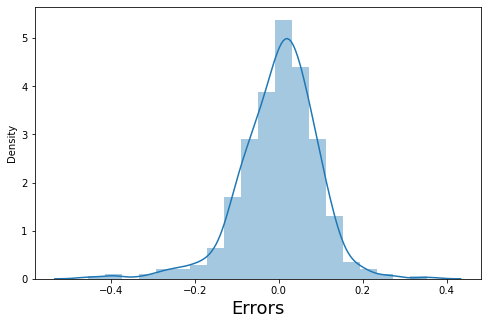

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

##### Error are independent of each other

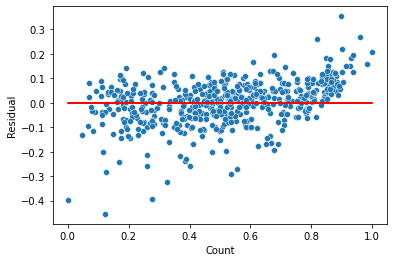

In [104]:
residual = y_train - y_train_predict #getting residual
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern in residual values.


##### Linear Relationship between X and y

##### for windspeed

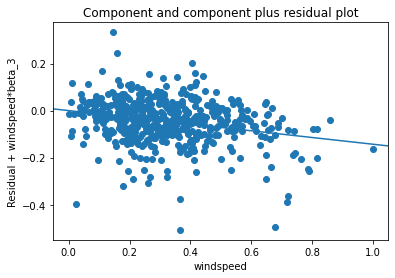

In [106]:
sm.graphics.plot_ccpr(model, 'windspeed')
plt.show()

##### for atemp

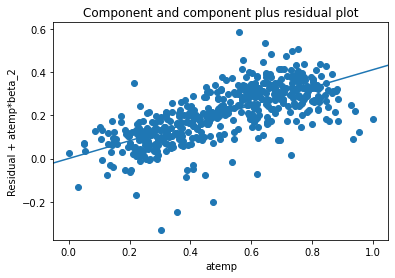

In [108]:
sm.graphics.plot_ccpr(model, 'atemp')
plt.show()

Here we can see that there is Linear Relationship between X and y.

> #### Making Predictions Using the Final Model

In [110]:
# scaling (min-max) on test dataset
num_vars = ['hum', 'windspeed', 'atemp', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  \
184   0        1           0  0.769660  0.657364   0.084219  0.692706   
535   1        0           1  0.842587  0.610133   0.153728  0.712034   
299   0        0           1  0.496145  0.837699   0.334206  0.303382   
221   0        0           1  0.795343  0.437098   0.339570  0.547400   
152   0        0           1  0.741471  0.314298   0.537414  0.569029   

     Light Rain + Scattered clouds  Mist + Broken clouds  spring  ...  Dec  \
184                              0                     1       0  ...    0   
535                              0                     0       0  ...    0   
299                              0                     1       0  ...    0   
221                              0                     0       0  ...    0   
152                              0                     0       0  ...    0   

     Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
184    0    0    1    0    0    0    0    0    0  
535    0    0    0    1    0    0    0    0    0  
299    0    0    0    0    0    0    0    1    0  
221    0    0    0    0    0    0    0    0    0  
152    0    0    0    1    0    0    0    0    0  

[5 rows x 29 columns]

In [111]:
bike_test.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.532991    0.638508    0.313350   
std      0.500722    0.188034    0.459904    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.000000    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.344751    0.527265    0.198517   
50%      0.000000    0.000000    1.000000    0.549198    0.627737    0.299459   
75%      1.000000    0.000000    1.000000    0.714132    0.743928    0.403048   
max      1.000000    1.000000    1.000000    0.980934    1.002146    0.807474   

              cnt  Light Rain + Scattered clouds  Mist + Broken clouds  \
count  219.000000                     219.000000            219.000000   
mean     0.520592                       0.027397              0.319635   
std      0.218435                       0.163612              0.467403   
min      0.048205                       0.000000              0.000000   
25%      0.377531                       0.000000              0.000000   
50%      0.524275                       0.000000              0.000000   
75%      0.672745                       0.000000              1.000000   
max      0.963300                       1.000000              1.000000   

           spring  ...         Dec         Feb         Jan         Jul  \
count  219.000000  ...  219.000000  219.000000  219.000000  219.000000   
mean     0.255708  ...    0.086758    0.100457    0.077626    0.105023   
std      0.437258  ...    0.282125    0.301297    0.268194    0.307285   
min      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
50%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%      1.000000  ...    0.000000    0.000000    0.000000    0.000000   
max      1.000000  ...    1.000000    1.000000    1.000000    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.095890    0.054795    0.086758    0.073059    0.082192    0.086758  
std      0.295115    0.228100    0.282125    0.260830    0.275286    0.282125  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

Dividing into X_test and y_test

In [112]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [113]:
new_col = X_train_rfe_final.columns # getting the final columns of X_train 
X_test = X_test[new_col] # using taht new_col list to filter the X_test data 
X_test.head()

yr     atemp  windspeed  Light Rain + Scattered clouds  \
184   0  0.769660   0.084219                              0   
535   1  0.842587   0.153728                              0   
299   0  0.496145   0.334206                              0   
221   0  0.795343   0.339570                              0   
152   0  0.741471   0.537414                              0   

     Mist + Broken clouds  spring  winter  Dec  Jan  Jul  Nov  Sep  
184                     1       0       0    0    0    1    0    0  
535                     0       0       0    0    0    0    0    0  
299                     1       0       1    0    0    0    0    0  
221                     0       0       0    0    0    0    0    0  
152                     0       0       0    0    0    0    0    0

In [114]:
# adding constant to X_test
X_test = sm.add_constant(X_test)
X_test.describe()

const          yr       atemp   windspeed  \
count  219.0  219.000000  219.000000  219.000000   
mean     1.0    0.479452    0.532991    0.313350   
std      0.0    0.500722    0.217888    0.159947   
min      1.0    0.000000    0.025950   -0.042808   
25%      1.0    0.000000    0.344751    0.198517   
50%      1.0    0.000000    0.549198    0.299459   
75%      1.0    1.000000    0.714132    0.403048   
max      1.0    1.000000    0.980934    0.807474   

       Light Rain + Scattered clouds  Mist + Broken clouds      spring  \
count                     219.000000            219.000000  219.000000   
mean                        0.027397              0.319635    0.255708   
std                         0.163612              0.467403    0.437258   
min                         0.000000              0.000000    0.000000   
25%                         0.000000              0.000000    0.000000   
50%                         0.000000              0.000000    0.000000   
75%                         0.000000              1.000000    1.000000   
max                         1.000000              1.000000    1.000000   

           winter         Dec         Jan         Jul         Nov         Sep  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.232877    0.086758    0.077626    0.105023    0.073059    0.086758  
std      0.423633    0.282125    0.268194    0.307285    0.260830    0.282125  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [115]:
# Predicting X_test using the prevouse model trained using X_train
y_predict = model.predict(X_test)

> #### Model Evaluation

In [117]:
# importing r2_score
from sklearn.metrics import r2_score

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

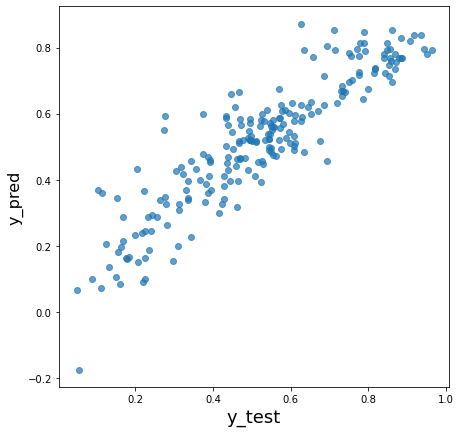

In [116]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_predict, alpha = 0.7)
fig.suptitle('y_test vs y_predict', fontsize = 20)          # Plot heading 
plt.xlabel('y_test', fontsize = 18)                         # X-label
plt.ylabel('y_pred', fontsize = 16)   

*****
#### R2 Value Calculation for bike_test dataframe

In [118]:
r2 = round(r2_score(y_test, y_predict),3) # getting r2_score of y_test and y_predict
r2

0.818

*****
#### Adjusted R2 Value Calculation for bike_test dataframe

In [119]:
# n is number of rows in test dataset
n = X_test.shape[0]

# p/predictors is the number of features 
p = X_test.shape[1]

# adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.806

#### R-square value: 
- **For test:**
    - R-squared: 0.818
    - Adj. R-squared: 0.806
*****

### The equation of best fitted surface based on final model is:
**cnt = (0.292594+0.23607 x yr)+(0.292594+0.41093 x atemp)+(0.292594-0.143023 x windspeed)+(0.292594-0.288052 x Light_Rain_+_Scattered_clouds)+(0.292594-0.080351 x Mist_+_Broken_clouds)+(0.292594-0.11223 x spring)+(0.292594+0.057974 x winter)+(0.292594-0.053943 x Dec)+(0.292594-0.057243 x Jan)+(0.292594-0.058775 x Jul)+(0.292594-0.057552 x Nov)+(0.292594+0.051825 x Sep)**

1. `const`: `0.292594`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.292594` unit.
2. `yr` : `0.23607`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.23607` unit.
3. `temp ` : `0.41093`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.41093` unit.
4. `windspeed ` : `-0.143023`
    - This means, when the absence of other predictor variables, the bike rental can still be deceased by a `0.143023` unit.
5. `Light Rain + Scattered clouds` : `-0.288052` 
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.288052` unit.
6. `Mist + Broken clouds` : `-0.080351` 
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.080351` unit.
7. `spring ` : `-0.11223`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.11223` unit.
8. `winter ` : `0.057974`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.057974` unit.
9. `Dec` : `-0.053943`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.053943` unit.
10. `Jan` : `-0.057243`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.057243` unit.
11. `Jul`: `-0.058775`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.058775` unit.
12. `Nov` : `-0.057552`     
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.057552` unit.
13. `Sep` : `0.051825`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.051825` unit.
****

## Final Result:
1. **R-square value:**
    a. **For train:**
        - R-squared: 0.832
        - Adj. R-squared: 0.828
    b. **For test:**
        - R-squared: 0.818
        - Adj. R-squared: 0.806
    c. Difference between train and test R-square value is 0.832-0.818 = 0.014 (1.4%)
    d. Difference between train and test Adj. R-squared value is 0.828-0.806 = 0.022 (2.2%)
2. `Temperature` shows the highest coefficient of around 0.410930, which means when the `temp` is increased by one unit, the rental bike increases by 0.410930
3. `Light Rain + Scattered clouds` shows a negative coefficient of around 0.288052; this means when `this variable` increases by one unit, the rental bike will decrease by 0.288052.
4. `yr` shows the 2nd  highest coefficient of around 0.23607, which means when the `yr` is increased by one unit, the rental bike increases by 0.23607
5. `windspeed` shows a second highest negative coefficient of around 0.143023; this means when `windspeed` variable increases by one unit, the rental bike will decrease by 0.143023.
6. `spring` shows a third highest negative coefficient of around 0.11223; this means when `spring` variable increases by one unit, the rental bike will decrease by 0.11223.
****

## Business Goals:
1. If the `temperature feel` is highly correlated and hiving a high coefficient with `cnt,` but we know from `EDA` that if the temperature goes higher than 35 , we see fewer bikes rented. So they should know that when the temperature feels like between `20-35`, there will be more people renting bikes. 
2. If the weather is like `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,` then people tend to rent bikes less. 
3. The windspeed shows a negative coefficient with `cnt,` but we need to know when wind speed is between `5-20` then people rent more bikes through EDA, but we have to know that wind speed above will always affect.
4. `spring` shows a negative coefficient with `cnt,` so we should offer more in `spring.`
5. The business  has increased from 2018 to 2019 so that's why it show high coefficient with `cnt`.